In [304]:
import pandas as pd
import numpy as np
import os

# Load Participants data

In [305]:
gender_mapping = {
    -1: "__noData__",
    0: "Male",
    1: "Female",
    2: "Other"
}

education_mapping = {
    -1: "__noData__",
    0: "No",
    1: "Primary",
    2: "High",
    3: "Bachelor",
    4: "Master",
    5: "Doctoral"
}

age_mapping = {
    -1: "__noData__",
    0: "0-15",
    16: "16-20",
    21: "21-30",
    29: "31-40",
    41: "41-50",
    51: "51-65",
    65: "65+"
}

In [306]:
df_participation = pd.read_csv("participation-export.csv", index_col=0)
# All participants with lower ID are dummy data
df_participation = df_participation.loc[31:]
# Filter out all testusers
df_participation.participant_email = df_participation.participant_email.fillna("")
df_participation = df_participation[~df_participation.participant_email.str.contains("testuser")]
df_participation.shape

(222, 11)

In [307]:
df_participation = df_participation[df_participation.age_group.notna()]


df_completed_participation = df_participation[df_participation.time_finished.notna()]
df_uncompleted_participation = df_participation[df_participation.time_finished.isna()]

df_participation.time_joined = pd.to_datetime(df_completed_participation.time_joined)
df_participation.time_finished = pd.to_datetime(df_completed_participation.time_finished)

df_participation.age_group = df_participation.age_group.astype(int).map(lambda x: age_mapping[x])
df_participation.gender = df_participation.gender.astype(int).map(lambda x: gender_mapping[x])
df_participation.education = df_participation.education.astype(int).map(lambda x: education_mapping[x])

In [308]:
df_participation.shape, df_completed_participation.shape

((218, 11), (138, 11))

In [309]:
df_completed_participation["source"] = "organic"
df_completed_participation.loc[df_completed_participation.user_study_id == 14, "source"] = "proliferic"

<ipython-input-309-024dc0c69fa6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completed_participation["source"] = "organic"
C:\Users\lpesk\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [310]:
df_completed_participation.groupby("user_study_id").count()
# study ID 14 equals prolific platform, others are various social channels of the study authors

,participant_email,age_group,gender,education,ml_familiar,time_joined,time_finished,uuid,language,extra_data,source
user_study_id,,,,,,,,,,,
13,44,44,44,44,44,44,44,44,44,30,44
14,73,73,73,73,73,73,73,73,73,73,73
15,8,8,8,8,8,8,8,8,8,8,8
16,8,8,8,8,8,8,8,8,8,8,8
17,5,5,5,5,5,5,5,5,5,5,5


In [311]:
df_completed_participation.time_joined = pd.to_datetime(df_completed_participation.time_joined)
df_completed_participation.time_finished = pd.to_datetime(df_completed_participation.time_finished)

df_completed_participation["time_taken"] = (df_completed_participation.time_finished - df_completed_participation.time_joined)
df_completed_participation["time_taken"] .describe()

C:\Users\lpesk\AppData\Roaming\Python\Python38\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-311-37a82753ff8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completed_participation["time_taken"] = (df_completed_participation.time_finished - df_completed_participation.time_joined)


count                          138
mean     0 days 00:17:34.987869500
std      0 days 00:18:43.331376781
min         0 days 00:04:38.463885
25%      0 days 00:09:45.106613250
50%      0 days 00:13:08.757193500
75%         0 days 00:16:25.768684
max         0 days 03:11:44.409032
Name: time_taken, dtype: object

- seems like even the shortest time to complete was long enough (also verified by the duration of individual steps)

In [312]:
df_completed_participation = df_completed_participation.drop("participant_email", axis=1)
df_completed_participation.to_csv("completed_participation.csv")

In [313]:
df_completed_participation.tail()

,age_group,gender,education,ml_familiar,user_study_id,time_joined,time_finished,uuid,language,extra_data,source,time_taken
id,,,,,,,,,,,,
255,21.0,0.0,3.0,True,13,2023-01-31 09:01:24.865897,2023-01-31 09:44:19.368049,p9dIraC4pkVfqBIUKF8l6w,en,{},organic,0 days 00:42:54.502152
257,21.0,0.0,5.0,True,13,2023-02-01 12:10:58.454443,2023-02-01 12:40:07.512894,Ki--H08-fYpLcwfBJsejZg,en,{},organic,0 days 00:29:09.058451
258,21.0,1.0,2.0,True,16,2023-02-01 17:25:40.130557,2023-02-01 17:37:57.838756,cX6JGJsf1YadMPM2pLRpZQ,cs,{},organic,0 days 00:12:17.708199
260,21.0,0.0,3.0,True,13,2023-02-05 03:17:24.130332,2023-02-05 03:44:28.323313,HTBSOe9r1Gs_thwoah3pYQ,en,{},organic,0 days 00:27:04.192981
261,29.0,1.0,4.0,False,13,2023-02-05 18:32:02.852475,2023-02-05 18:47:31.919125,V_ndJ0N8u0x5V8Rk5fgF7g,cs,{},organic,0 days 00:15:29.066650


In [314]:
df_completed_participation.groupby("source")[["time_taken"]].quantile(0.5)

,time_taken
source,
organic,0 days 00:13:51.776985
proliferic,0 days 00:12:40.200996


# Load Interactions

In [315]:
def get_participants_interaction(df_i, df_p):
    return df_i[df_i.participation.isin(df_p.index)]

In [316]:
df_interaction = pd.read_json("interaction-export.json", encoding='utf-8')
# Only get interactions of completing, non-dummy-data participants
df_interaction = get_participants_interaction(df_interaction, df_completed_participation)

In [317]:
df_interaction.tail()

,id,participation,interaction_type,time,data
47296,47797,261,iteration-ended,2023-02-05 18:47:31.911054,"{""iteration"": 8, ""selected"": [[1231, 1184, 792..."
47297,47798,261,study-ended,2023-02-05 18:47:31.915892,"{""iteration"": 8}"
47298,47799,261,on-input,2023-02-05 18:47:31.930910,"{""id"": """", ""text"": ""Ukončit průzkum"", ""name"": ..."
47299,47800,261,loaded-page,2023-02-05 18:47:41.270902,"{""page"": ""finished_user_study"", ""context"": {""u..."
47300,47801,261,changed-viewport,2023-02-05 18:47:41.289014,"{""viewport"": {""left"": 0, ""top"": 0, ""width"": 12..."


In [318]:
N_ITERATIONS = 8
def get_iteration(x):
    return json.loads(x)["iteration"]

In [319]:
import json
def set_iteration(row):
    if row.interaction_type == "iteration-started" or row.interaction_type == "iteration-ended":
        row['iteration'] = json.loads(row.data)['iteration']
    else:
        row['iteration'] = None
    return row

def set_result_layout(row):
    if row.interaction_type == "iteration-started":
        row['result_layout'] = json.loads(row.data)['result_layout']
    else:
        row['result_layout'] = None
    return row

#'algorithm_assignment': {'0': {'algorithm': 'relevance_based',
#   'name': 'gamma',
#   'order': 1},
#  '1': {'algorithm': 'weighted_average', 'name': 'delta', 'order': 0}},

def set_mapping(row):
    if row.interaction_type == 'iteration-started':
        dat = json.loads(row.data)['algorithm_assignment'].values()
        for mapping in dat:
            row[mapping['name'].upper()] = mapping['order']
    else:
        row['GAMMA'] = None
        row['DELTA'] = None
    return row




d = df_interaction.copy()
d = d.set_index("id")
d = d.apply(set_iteration, axis=1).apply(set_result_layout, axis=1).apply(set_mapping, axis=1)
d['iteration'] = d.groupby(['participation'], sort=False)['iteration'].apply(lambda x: x.ffill())
d['result_layout'] = d.groupby(['participation'], sort=False)['result_layout'].apply(lambda x: x.ffill())
d['GAMMA'] = d.groupby(['participation'], sort=False)['GAMMA'].apply(lambda x: x.ffill())
d['DELTA'] = d.groupby(['participation'], sort=False)['DELTA'].apply(lambda x: x.ffill())
d = d[d.iteration.notna()]

# Statistics on preference elicitation phase

In [320]:
d_phase_two = df_interaction.copy()
d_phase_two = d_phase_two.set_index("id")
d_phase_two = d_phase_two.apply(set_iteration, axis=1)
d_phase_two['iteration'] = d_phase_two.groupby(['participation'], sort=False)['iteration'].apply(lambda x: x.ffill())

In [321]:
d_phase_two = d_phase_two.fillna(-1)

In [322]:
d_phase_two = d_phase_two.loc[((d_phase_two.iteration == -1) & (d_phase_two.interaction_type=="selected-item"))]
d_phase_two.shape

(2311, 5)

In [323]:
d_phase_two = df_completed_participation[["source","time_taken"]].join(d_phase_two.set_index("participation"))
d_phase_two

,source,time_taken,interaction_type,time,data,iteration
36,organic,0 days 00:06:55.974455,selected-item,2023-01-15 23:13:32.643579,"{""selected_item"": {""movieName"": ""Harry Potter ...",-1.0
36,organic,0 days 00:06:55.974455,selected-item,2023-01-15 23:13:33.090109,"{""selected_item"": {""movieName"": ""Harry Potter ...",-1.0
36,organic,0 days 00:06:55.974455,selected-item,2023-01-15 23:13:33.626484,"{""selected_item"": {""movieName"": ""Harry Potter ...",-1.0
36,organic,0 days 00:06:55.974455,selected-item,2023-01-15 23:13:33.962249,"{""selected_item"": {""movieName"": ""Harry Potter ...",-1.0
36,organic,0 days 00:06:55.974455,selected-item,2023-01-15 23:13:34.461530,"{""selected_item"": {""movieName"": ""Harry Potter ...",-1.0
...,...,...,...,...,...,...
261,organic,0 days 00:15:29.066650,selected-item,2023-02-05 18:33:09.417582,"{""selected_item"": {""movieName"": ""Blue Planet I...",-1.0
261,organic,0 days 00:15:29.066650,selected-item,2023-02-05 18:33:17.712428,"{""selected_item"": {""movieName"": ""Piráti z Kari...",-1.0
261,organic,0 days 00:15:29.066650,selected-item,2023-02-05 18:33:19.965488,"{""selected_item"": {""movieName"": ""Chlapec v pru...",-1.0
261,organic,0 days 00:15:29.066650,selected-item,2023-02-05 18:33:21.284391,"{""selected_item"": {""movieName"": ""Iron Man (200...",-1.0


In [324]:
countPreferenceElicitationSelected = d_phase_two.reset_index().groupby(["index","source"])[["data"]].count()
countPreferenceElicitationSelected = countPreferenceElicitationSelected.reset_index()

In [325]:
countPreferenceElicitationSelected.loc[countPreferenceElicitationSelected.source=="organic","data"].describe()

count     65.000000
mean      20.138462
std       29.253673
min        0.000000
25%        9.000000
50%       13.000000
75%       19.000000
max      222.000000
Name: data, dtype: float64

In [326]:
countPreferenceElicitationSelected.loc[countPreferenceElicitationSelected.source=="proliferic","data"].describe()

count    73.000000
mean     13.726027
std      11.099625
min       0.000000
25%       8.000000
50%      10.000000
75%      14.000000
max      52.000000
Name: data, dtype: float64

## Screen resolutions

In [327]:
import json

In [328]:
# Returns interactions of given type
def get_interactions(df, int_type):
    return df[df["interaction_type"] == int_type]

In [329]:
# Get first changed-viewport event to be able to read resolution
df = get_interactions(df_interaction, "changed-viewport").groupby(["participation"]).first()

def get_resolution(x):
    d = json.loads(x)["screen_sizes"]
    return d["window.screen.width"], d["window.screen.height"]

df["resolution"] = df.data.map(get_resolution)

In [330]:
df.groupby(["resolution"])["resolution"].count()

resolution
(1280, 720)      6
(1281, 721)      1
(1352, 878)      1
(1366, 768)     19
(1368, 912)      1
(1440, 900)     12
(1536, 864)     31
(1536, 960)      1
(1680, 1050)     2
(1707, 960)      1
(1728, 1117)     1
(1920, 1080)    46
(1920, 1200)     3
(2048, 1153)     1
(2275, 1280)     1
(2560, 1440)    10
(3840, 2160)     1
Name: resolution, dtype: int64

# Participants to remove
- no selections in preference ellicitation
- time below 4:20 (i.e., 1/3 of median value)

In [331]:
participants_to_remove = countPreferenceElicitationSelected.loc[countPreferenceElicitationSelected.data <=0,"index"].tolist()
participants_to_remove

[109, 248]

In [332]:
print(d.shape, df_completed_participation.shape, d_phase_two.shape)
d = d.loc[~d.participation.isin(participants_to_remove)]
df_completed_participation = df_completed_participation.loc[~df_completed_participation.index.isin(participants_to_remove)]
d_phase_two = d_phase_two.loc[~d_phase_two.index.isin(participants_to_remove)]
print(d.shape, df_completed_participation.shape, d_phase_two.shape)

(30305, 8) (138, 12) (2313, 6)
(29925, 8) (136, 12) (2311, 6)


In [333]:
d["variant"] = -1
print(d.shape)
d.loc[d["interaction_type"] == "selected-item", "variant"] = d[d["interaction_type"] == "selected-item"].data.map(lambda x: json.loads(x)["selected_item"]).map(lambda x: x.get("variant", -1))
d = d.loc[d.iteration <= 8] 
print(d.shape)

(29925, 9)
(29884, 9)


### Usage stats

In [334]:
from scipy.stats import ttest_ind
ttest_ind(df_completed_participation.loc[df_completed_participation.source=="organic","time_taken"].dt.total_seconds(),
          df_completed_participation.loc[df_completed_participation.source=="proliferic","time_taken"].dt.total_seconds())

Ttest_indResult(statistic=2.4354076741427844, pvalue=0.01618966123144717)

In [335]:
print(df_completed_participation.loc[df_completed_participation.source=="organic","time_taken"].median(),
    df_completed_participation.loc[df_completed_participation.source=="proliferic","time_taken"].median())

0 days 00:13:37.088258500 0 days 00:12:35.709697500


In [336]:
print(d_phase_two.loc[d_phase_two.source=="organic"].reset_index().groupby("index")[["data"]].count().mean(),
    d_phase_two.loc[d_phase_two.source=="proliferic"].reset_index().groupby("index")[["data"]].count().mean())

data    20.453125
dtype: float64 data    13.916667
dtype: float64


In [337]:
ttest_ind(d_phase_two.loc[d_phase_two.source=="organic"].reset_index().groupby("index")["data"].count(),
          d_phase_two.loc[d_phase_two.source=="proliferic"].reset_index().groupby("index")["data"].count())

Ttest_indResult(statistic=1.7542143976810227, pvalue=0.08167980474691806)

In [338]:
df_completed_participation.groupby("source").count()

,age_group,gender,education,ml_familiar,user_study_id,time_joined,time_finished,uuid,language,extra_data,time_taken
source,,,,,,,,,,,
organic,64,64,64,64,64,64,64,64,64,50,64
proliferic,72,72,72,72,72,72,72,72,72,72,72


### Number of all recorded interactions per layout

In [339]:
d["layout_high_level"] = "cols"
d.loc[d.result_layout == "row-single-scrollable","layout_high_level"] = "rows"
d.loc[d.result_layout == "row-single","layout_high_level"] = "rows"
d.loc[d.result_layout == "rows","layout_high_level"] = "rows"
d.groupby("layout_high_level").count()

,participation,interaction_type,time,data,iteration,result_layout,GAMMA,DELTA,variant
layout_high_level,,,,,,,,,
cols,17343,17343,17343,17343,17343,17343,17343,17343,17343
rows,12541,12541,12541,12541,12541,12541,12541,12541,12541


In [340]:
d.groupby("result_layout").count()

,participation,interaction_type,time,data,iteration,GAMMA,DELTA,variant,layout_high_level
result_layout,,,,,,,,,
column-single,7197,7197,7197,7197,7197,7197,7197,7197,7197
columns,5539,5539,5539,5539,5539,5539,5539,5539,5539
max-columns,4607,4607,4607,4607,4607,4607,4607,4607,4607
row-single,3287,3287,3287,3287,3287,3287,3287,3287,3287
row-single-scrollable,4407,4407,4407,4407,4407,4407,4407,4407,4407
rows,4847,4847,4847,4847,4847,4847,4847,4847,4847


### Number of participants per result layout

In [341]:
d[d.interaction_type == "iteration-started"].groupby(["layout_high_level"]).count() // 2 # Everyone is shown every layout twice (with different algorithm order)

,participation,interaction_type,time,data,iteration,result_layout,GAMMA,DELTA,variant
layout_high_level,,,,,,,,,
cols,291,291,291,291,291,291,291,291,291
rows,262,262,262,262,262,262,262,262,262


In [342]:
d[d.interaction_type == "iteration-started"].groupby(["result_layout"]).count() // 2 # Everyone is shown every layout twice (with different algorithm order)

,participation,interaction_type,time,data,iteration,GAMMA,DELTA,variant,layout_high_level
result_layout,,,,,,,,,
column-single,103,103,103,103,103,103,103,103,103
columns,98,98,98,98,98,98,98,98,98
max-columns,90,90,90,90,90,90,90,90,90
row-single,89,89,89,89,89,89,89,89,89
row-single-scrollable,81,81,81,81,81,81,81,81,81
rows,92,92,92,92,92,92,92,92,92


### Number of selected items per iteration

In [343]:
selected_item_interactions = d[d.variant >= 0]
selected_item_interactions.shape

(6892, 10)

In [344]:
def getSelectedMovieId(x):
    return json.loads(x)["selected_item"]["movie_id"]

selected_item_interactions["movieID"] = np.nan
selected_item_interactions.movieID = selected_item_interactions.data.map(lambda x: getSelectedMovieId(x))

<ipython-input-344-5e14ab3e7244>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_item_interactions["movieID"] = np.nan
C:\Users\lpesk\AppData\Roaming\Python\Python38\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [345]:
selected_item_interactions = selected_item_interactions.drop_duplicates(["participation","iteration","variant","movieID"], keep="last")
print(selected_item_interactions.shape)

(6784, 11)


In [346]:
selected_item_interactions.reset_index().groupby("iteration").count()

,id,participation,interaction_type,time,data,result_layout,GAMMA,DELTA,variant,layout_high_level,movieID
iteration,,,,,,,,,,,
1.0,882,882,882,882,882,882,882,882,882,882,882
2.0,892,892,892,892,892,892,892,892,892,892,892
3.0,846,846,846,846,846,846,846,846,846,846,846
4.0,831,831,831,831,831,831,831,831,831,831,831
5.0,837,837,837,837,837,837,837,837,837,837,837
6.0,813,813,813,813,813,813,813,813,813,813,813
7.0,843,843,843,843,843,843,843,843,843,843,843
8.0,840,840,840,840,840,840,840,840,840,840,840


### Volume of selected items per user

<AxesSubplot:>

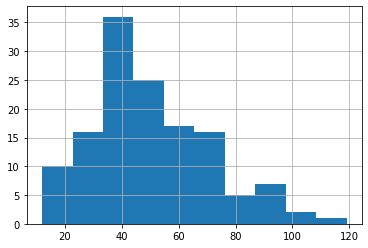

In [347]:
selected_item_interactions.groupby("participation").count()["variant"].hist()

### Volume of selected items per platform

In [348]:
dfSP = df_completed_participation[["source","time_taken"]].join(selected_item_interactions.set_index("participation"))
countPP = dfSP.reset_index().groupby(["source","index"])[["data"]].count().reset_index()
countPP.groupby("source")[["data"]].mean()

,data
source,
organic,46.468750
proliferic,52.916667


In [349]:
from scipy.stats import ttest_ind
ttest_ind(countPP.loc[countPP.source=="organic","data"],countPP.loc[countPP.source=="proliferic","data"])

Ttest_indResult(statistic=-1.7895377588150694, pvalue=0.07578688255454193)

- although prolific participants have less items (not stat. sign.) selected during pref. elicitation, they selected more (not stat. sign.) in the recs comparison

# Saving pre-processed data

In [351]:
import pickle

outfile = open("interaction_data.pkl",'wb')
pickle.dump(d,outfile)
outfile.close()

outfile = open("phase3_selections.pkl",'wb')
pickle.dump(selected_item_interactions,outfile)
outfile.close()

outfile = open("df_completed_participation.pkl",'wb')
pickle.dump(df_completed_participation,outfile)
outfile.close()

In [352]:
d.shape, df.shape

((29884, 10), (138, 5))

# Basic demographics and participant details
#### Number of participations and unique participants

In [360]:
print(f"N participations: {df_participation.shape[0]}")
print(f"N completed participations: {df_completed_participation.shape[0]}")
print(f"N uncompleted participations: {df_uncompleted_participation.shape[0]}")

N participations: 218
N completed participations: 136
N uncompleted participations: 80


In [361]:
df_completed_participation.groupby("source").count()

,age_group,gender,education,ml_familiar,user_study_id,time_joined,time_finished,uuid,language,extra_data,time_taken
source,,,,,,,,,,,
organic,64,64,64,64,64,64,64,64,64,50,64
proliferic,72,72,72,72,72,72,72,72,72,72,72


In [362]:
df_completed_participation.groupby("source")[["time_taken"]].quantile(0.5)

,time_taken
source,
organic,0 days 00:13:37.088258500
proliferic,0 days 00:12:35.709697500


In [363]:
df_completed_participation.gender.value_counts()

0.0    88
1.0    44
2.0     4
Name: gender, dtype: int64

In [364]:
df_completed_participation.education.value_counts()

2.0    50
3.0    49
4.0    27
5.0     8
0.0     2
Name: education, dtype: int64

In [365]:
df_completed_participation.age_group.value_counts()

21.0    85
29.0    22
16.0    13
51.0     8
41.0     4
65.0     2
0.0      2
Name: age_group, dtype: int64

In [366]:
df_completed_participation.ml_familiar.value_counts()

True     73
False    63
Name: ml_familiar, dtype: int64